In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import json
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
df = pd.read_csv(r"D:\305-Marketing_Analysis\superstore_dataset2011-2015.csv", encoding='latin-1' )

df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.00,106.14,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.37,3,0.10,36.04,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.12,4,0.00,29.64,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.87,3,0.50,-26.05,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67,5,0.10,37.77,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,32593,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.90,2,0.20,4.52,0.89,Medium
51286,47594,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.99,1,0.00,0.42,0.49,Medium
51287,8857,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.40,3,0.00,12.36,0.35,Medium
51288,6852,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,...,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.12,1,0.00,0.56,0.20,Medium


In [3]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [4]:
# replace the void space in the column name with underscore

df.columns = [col.lower().replace(" ","_") for col in df.columns]

df = df.drop(['row_id', 'ship_date', 'customer_name', 'postal_code', 'shipping_cost', 'order_priority'], axis=1)

In [5]:
pd.to_datetime(df['order_date'])

0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
51285   2014-12-31
51286   2014-12-31
51287   2014-12-31
51288   2014-12-31
51289   2014-12-31
Name: order_date, Length: 51290, dtype: datetime64[ns]

In [6]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [7]:
df['order_date'].tail()

51285   2014-12-31
51286   2014-12-31
51287   2014-12-31
51288   2014-12-31
51289   2014-12-31
Name: order_date, dtype: datetime64[ns]

In [8]:
datetime.strptime('2015-01-31', '%Y-%m-%d')

datetime.datetime(2015, 1, 31, 0, 0)

In [9]:
# Analysis as of: 2015-01-31 (max order date in the dataset: 2014-12-31)
today = datetime.strptime('2015-01-31', '%Y-%m-%d')

In [10]:
df.head()

,order_id,order_date,ship_mode,customer_id,segment,city,state,country,market,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit
0,AG-2011-2040,2011-01-01,Standard Class,TB-11280,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.00,106.14
1,IN-2011-47883,2011-01-01,Standard Class,JH-15985,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.37,3,0.10,36.04
2,HU-2011-1220,2011-01-01,Second Class,AT-735,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.12,4,0.00,29.64
3,IT-2011-3647632,2011-01-01,Second Class,EM-14140,Home Office,Stockholm,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.87,3,0.50,-26.05
4,IN-2011-47883,2011-01-01,Standard Class,JH-15985,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67,5,0.10,37.77


In [11]:
# Check missing values in dataset
df.isnull().sum()

order_id        0
order_date      0
ship_mode       0
customer_id     0
segment         0
city            0
state           0
country         0
market          0
region          0
product_id      0
category        0
sub-category    0
product_name    0
sales           0
quantity        0
discount        0
profit          0
dtype: int64

In [12]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
51285    False
51286    False
51287    False
51288    False
51289    False
Length: 51290, dtype: bool

In [13]:
type_of_column = []
for col in df.columns:
#     print(col)
#     print(type(col))
    print(df[col].dtype)
    if type(col) not in type_of_column:
#         print(col)
        type_of_column.append(df[col].dtype)
    else:
        pass

object
datetime64[ns]
object
object
object
object
object
object
object
object
object
object
object
object
float64
int64
float64
float64


In [14]:
type_of_column

[dtype('O'),
 dtype('<M8[ns]'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64')]

In [15]:
import matplotlib.pyplot as plt

type_of_column[0] = str(type_of_column[0])
type_of_column

['object',
 dtype('<M8[ns]'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64')]

In [16]:
for x in type_of_column:
    print(x)

object
datetime64[ns]
object
object
object
object
object
object
object
object
object
object
object
object
float64
int64
float64
float64


['object', dtype('<M8[ns]'), dtype('O'), dtype('float64'), dtype('int64')]
[1, 1, 12, 3, 1]


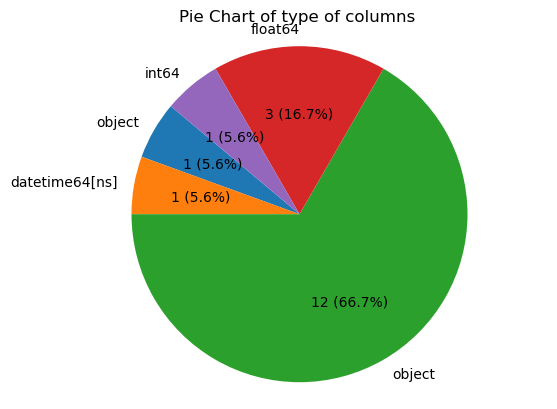

In [17]:
data_counts = {}

for item in type_of_column:
    if item in data_counts:
        data_counts[item] += 1
    else:
        data_counts[item] = 1

labels = list(data_counts.keys())
print(labels)
sizes = list(data_counts.values())
print(sizes)


# Create a pie chart
plt.title("Pie Chart of type of columns ")
plt.pie(sizes, labels=labels, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(sizes) / 100, p), startangle=140, )
plt.axis("equal")  # Equal aspect ratio ensures the pie chart is circular.


# Display the chart

plt.show()


In [18]:
agg_dict1 = {
    'order_id': 'count', # number of orders from that order id
    'order_date': 'max', # last date of ordering
    'sales': 'sum'       # total sales on this order id 
}
df_rfm = df.groupby('customer_id').agg(agg_dict1).reset_index()

In [19]:
df_rfm

,customer_id,order_id,order_date,sales
0,AA-10315,42,2014-12-23,"13,747.41"
1,AA-10375,42,2014-12-25,"5,884.20"
2,AA-10480,38,2014-09-05,"17,695.59"
3,AA-10645,73,2014-12-05,"15,343.89"
4,AA-315,8,2014-12-29,"2,243.26"
...,...,...,...,...
1585,YS-21880,54,2014-12-22,"18,703.61"
1586,ZC-11910,1,2014-06-14,7.17
1587,ZC-21910,84,2014-12-28,"28,472.82"
1588,ZD-11925,18,2014-12-28,"2,951.23"


In [20]:
df_rfm.columns = ['customer_id', 'frequency', 'max_date', 'monetary'] # change the column names 

In [21]:
df_rfm

,customer_id,frequency,max_date,monetary
0,AA-10315,42,2014-12-23,"13,747.41"
1,AA-10375,42,2014-12-25,"5,884.20"
2,AA-10480,38,2014-09-05,"17,695.59"
3,AA-10645,73,2014-12-05,"15,343.89"
4,AA-315,8,2014-12-29,"2,243.26"
...,...,...,...,...
1585,YS-21880,54,2014-12-22,"18,703.61"
1586,ZC-11910,1,2014-06-14,7.17
1587,ZC-21910,84,2014-12-28,"28,472.82"
1588,ZD-11925,18,2014-12-28,"2,951.23"


In [22]:
(today - df_rfm['max_date'])

0       39 days
1       37 days
2      148 days
3       57 days
4       33 days
         ...   
1585    40 days
1586   231 days
1587    34 days
1588    34 days
1589    32 days
Name: max_date, Length: 1590, dtype: timedelta64[ns]

In [23]:
(today - df_rfm['max_date']).dt.days   # since we want to calculate the number of days since he last order till today 

0        39
1        37
2       148
3        57
4        33
       ... 
1585     40
1586    231
1587     34
1588     34
1589     32
Name: max_date, Length: 1590, dtype: int64

In [24]:
df_rfm['recency'] = (today - df_rfm['max_date']).dt.days   # recency is number of days since last order

In [25]:
df_rfm.drop(['max_date'], axis = 1, inplace = True)        

In [26]:
df_rfm

,customer_id,frequency,monetary,recency
0,AA-10315,42,"13,747.41",39
1,AA-10375,42,"5,884.20",37
2,AA-10480,38,"17,695.59",148
3,AA-10645,73,"15,343.89",57
4,AA-315,8,"2,243.26",33
...,...,...,...,...
1585,YS-21880,54,"18,703.61",40
1586,ZC-11910,1,7.17,231
1587,ZC-21910,84,"28,472.82",34
1588,ZD-11925,18,"2,951.23",34


In [27]:
pd.qcut(range(10),3)

[(-0.001, 3.0], (-0.001, 3.0], (-0.001, 3.0], (-0.001, 3.0], (3.0, 6.0], (3.0, 6.0], (3.0, 6.0], (6.0, 9.0], (6.0, 9.0], (6.0, 9.0]]
Categories (3, interval[float64, right]): [(-0.001, 3.0] < (3.0, 6.0] < (6.0, 9.0]]

In [28]:
pd.qcut(range(10),3,labels=["good", "medium", "bad"])

['good', 'good', 'good', 'good', 'medium', 'medium', 'medium', 'bad', 'bad', 'bad']
Categories (3, object): ['good' < 'medium' < 'bad']

In [29]:
r_labels, f_labels, m_labels = range(5, 0, -1), range(1,6), range(1,6)

df_rfm['r_score'] = pd.qcut(df_rfm['recency'], q=5, labels=r_labels).astype(int)
df_rfm['f_score'] = pd.qcut(df_rfm['frequency'], q=5, labels=f_labels).astype(int)
df_rfm['m_score'] = pd.qcut(df_rfm['monetary'], q=5, labels=m_labels).astype(int)

df_rfm['rfm_sum'] = df_rfm['r_score'] + df_rfm['f_score'] + df_rfm['m_score']

In [30]:
df_rfm

,customer_id,frequency,monetary,recency,r_score,f_score,m_score,rfm_sum
0,AA-10315,42,"13,747.41",39,5,4,4,13
1,AA-10375,42,"5,884.20",37,5,4,3,12
2,AA-10480,38,"17,695.59",148,2,3,5,10
3,AA-10645,73,"15,343.89",57,4,5,5,14
4,AA-315,8,"2,243.26",33,5,1,2,8
...,...,...,...,...,...,...,...,...
1585,YS-21880,54,"18,703.61",40,5,4,5,14
1586,ZC-11910,1,7.17,231,1,1,1,3
1587,ZC-21910,84,"28,472.82",34,5,5,5,15
1588,ZD-11925,18,"2,951.23",34,5,3,2,10


In [31]:
def assign_label(df, r_rule, fm_rule, label, colname='rfm_label'):
    df.loc[(df['r_score'].between(r_rule[0], r_rule[1]))
            & (df['f_score'].between(fm_rule[0], fm_rule[1])), colname] = label
    return df

In [32]:
df_rfm['rfm_label'] = ''

df_rfm = assign_label(df_rfm, (5,5), (4,5), 'champions')
df_rfm = assign_label(df_rfm, (3,4), (4,5), 'loyal customers')
df_rfm = assign_label(df_rfm, (4,5), (2,3), 'potential loyalist')
df_rfm = assign_label(df_rfm, (5,5), (1,1), 'new customers')
df_rfm = assign_label(df_rfm, (4,4), (1,1), 'promising')
df_rfm = assign_label(df_rfm, (3,3), (3,3), 'needing attention')
df_rfm = assign_label(df_rfm, (3,3), (1,2), 'about to sleep')
df_rfm = assign_label(df_rfm, (1,2), (3,4), 'at risk')
df_rfm = assign_label(df_rfm, (1,2), (5,5), 'cant loose them')
df_rfm = assign_label(df_rfm, (1,2), (1,2), 'hibernating')

In [33]:
df_rfm

,customer_id,frequency,monetary,recency,r_score,f_score,m_score,rfm_sum,rfm_label
0,AA-10315,42,"13,747.41",39,5,4,4,13,champions
1,AA-10375,42,"5,884.20",37,5,4,3,12,champions
2,AA-10480,38,"17,695.59",148,2,3,5,10,at risk
3,AA-10645,73,"15,343.89",57,4,5,5,14,loyal customers
4,AA-315,8,"2,243.26",33,5,1,2,8,new customers
...,...,...,...,...,...,...,...,...,...
1585,YS-21880,54,"18,703.61",40,5,4,5,14,champions
1586,ZC-11910,1,7.17,231,1,1,1,3,hibernating
1587,ZC-21910,84,"28,472.82",34,5,5,5,15,champions
1588,ZD-11925,18,"2,951.23",34,5,3,2,10,potential loyalist


RFM Customer Segments

Champions - bought recently, buy often and spend the most

Loyal Customers - spend good money and often, responsive to promotions

Potential Loyalist - recent customers, but spent a good amount and bought more than once

New Customers - bought most recently, but not often

Promising - recent shoppers, but haven’t spent much

Needing Attention - above average recency, frequency and monetary values; may not have bought very recently though

About To Sleep - below average recency, frequency and monetary values; will lose them if not reactivated

At Risk - spent big money and purchased often but long time ago; need to bring them back

Can't Loose Them - made biggest purchases, and often but haven’t returned for a long time

Hibernating - last purchase was long back, low spenders and low number of orders

## Distribution of Recency, Frequency and Monetary

Recency distribution is right-skewed, showing that the majority of customers made a purchase in the recent past. It has a long tail containing single customers who made their order long time ago.

Both frequency and monetary distributions are bimodal (with two different peaks - modes). The chart reveals that one group of customers has low frequency (small number of orders, around 10 per customer) and another group is much more "loyal" (with around 50 purchases per customer). When it comes to monetary, it follows similar pattern. Part of customers have only spent little amount of money but there is another (significant in size) group that have spent much more.

Frequency and monetary distributions suggest that there are visible differences between different groups of customers. By looking at the distribution of three the biggest segments: "loyal customers", "hibernating", "potential loyalist" it's easy to see that indeed they build up different parts of total distribution, eg. hibernating customers are responsible for first monetary peak and loyal customers for the second peak.

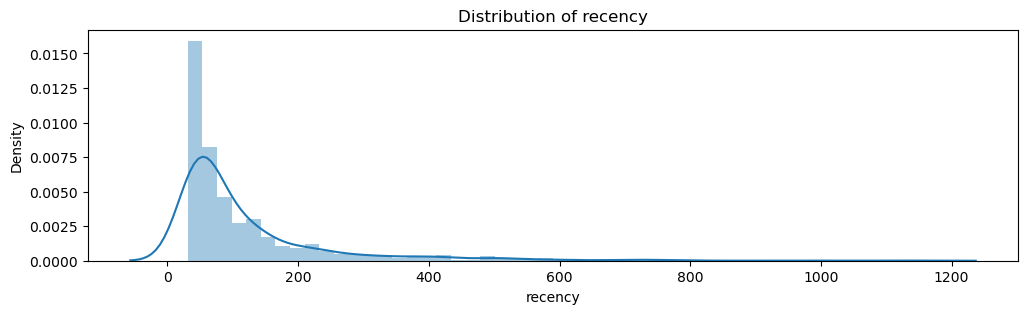

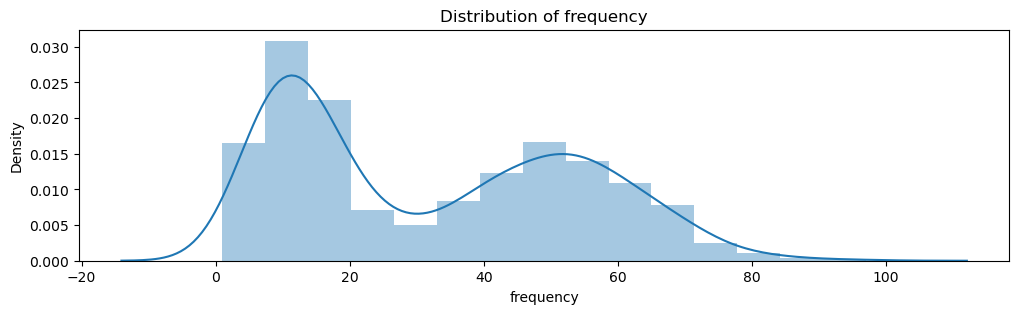

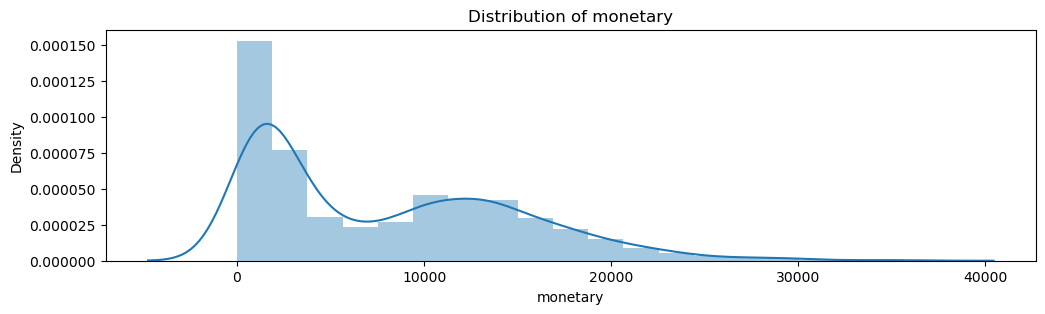

In [34]:
colnames = ['recency', 'frequency', 'monetary']

for col in colnames:
    fig, ax = plt.subplots(figsize=(12,3))
    sns.distplot(df_rfm[col])
    ax.set_title('Distribution of %s' % col)
    plt.show()

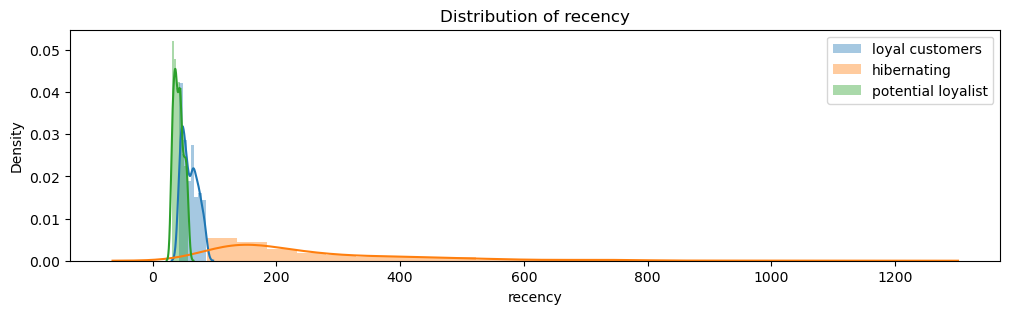

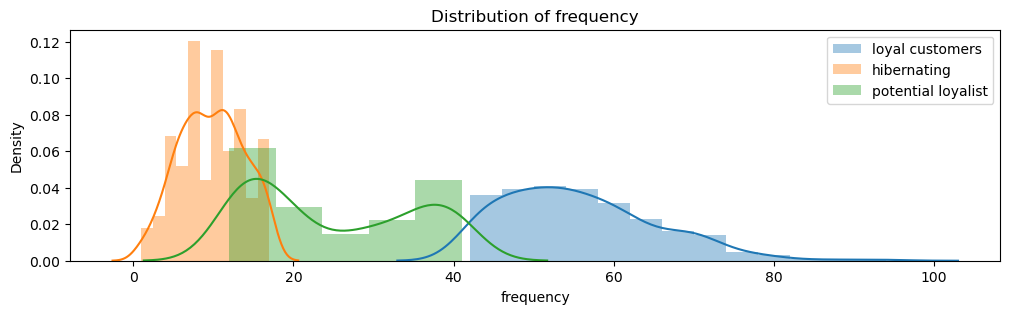

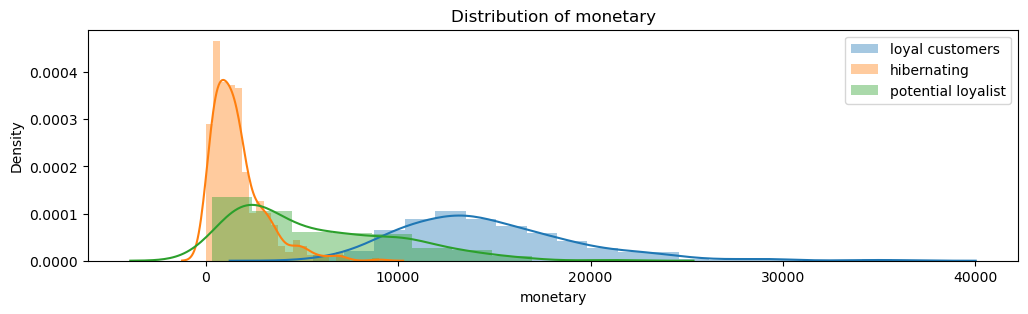

In [35]:
segments = ['loyal customers', 'hibernating', 'potential loyalist']

for col in colnames:
    fig, ax = plt.subplots(figsize=(12,3))
    for segment in segments:
        sns.distplot(df_rfm[df_rfm['rfm_label']==segment][col], label=segment)
    ax.set_title('Distribution of %s' % col)
    plt.legend()
    plt.show()

## Analysis of RFM Segments

Analysis of clusters obtained by summing up RFM scores shows that their sizes are quite similar. There is a peak around score = 12 which shows that the group of customers from segments 11-13 is numerous - those are the customers that generate stable, significant income. The smallest segment is for RFM score = 15 - it's understandable cause those are the most valuable gems in the customer base. Although it's the smallest group, it is still quite big in size.

Analysis of clusters based on set of rules applied to R-F-M scores is much more diverse. It's good to see that 'loyal customers' and 'potential loyalists' constitute around 1/3 of all customers (generating almost 1/2 of sales). What is more, there is strong group of 'champions' who are the most profitable customers (13% of all customers generating 25% of all sales). At the same time it should worry that group of 'hibernating' is so big - over 1/4 of all customers. There is an opportunity that part of this group could be reactivated with a reach out campaign. Moreover, the company should focus on the group 'at risk' to increase customer retention (they generate 10% of total sales).

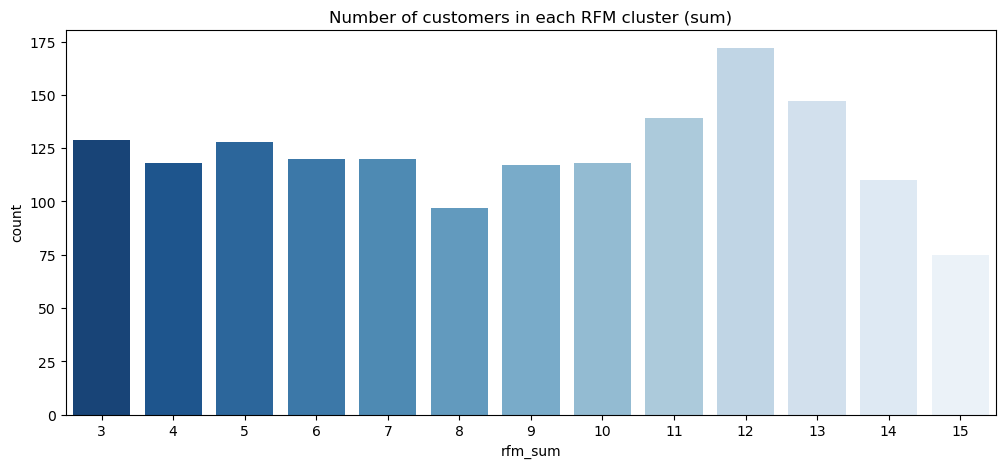

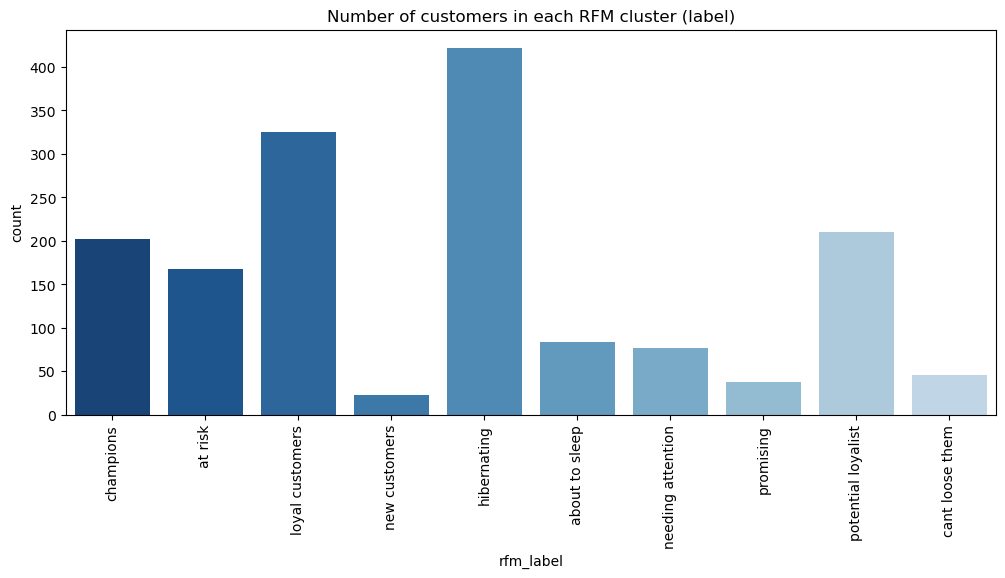

In [36]:
palette = sns.color_palette("Blues_r", n_colors=13)

for rfm_type in ['sum', 'label']:
    fig, ax = plt.subplots(figsize=(12,5))
    sns.countplot(x='rfm_'+rfm_type, data=df_rfm, palette=palette)
    ax.set_title('Number of customers in each RFM cluster (%s)' % rfm_type)
    if rfm_type == 'label':
        plt.xticks(rotation=90)
    plt.show()

In [37]:
agg_dict2 = {
    'customer_id': 'count',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'sum'
}

df_analysis = df_rfm.groupby('rfm_label').agg(agg_dict2).sort_values(by='recency').reset_index()
df_analysis.rename({'rfm_label': 'label', 'customer_id': 'count'}, axis=1, inplace=True)
df_analysis['count_share'] = df_analysis['count'] / df_analysis['count'].sum()
df_analysis['monetary_share'] = df_analysis['monetary'] / df_analysis['monetary'].sum()
df_analysis['monetary'] = df_analysis['monetary'] / df_analysis['count']

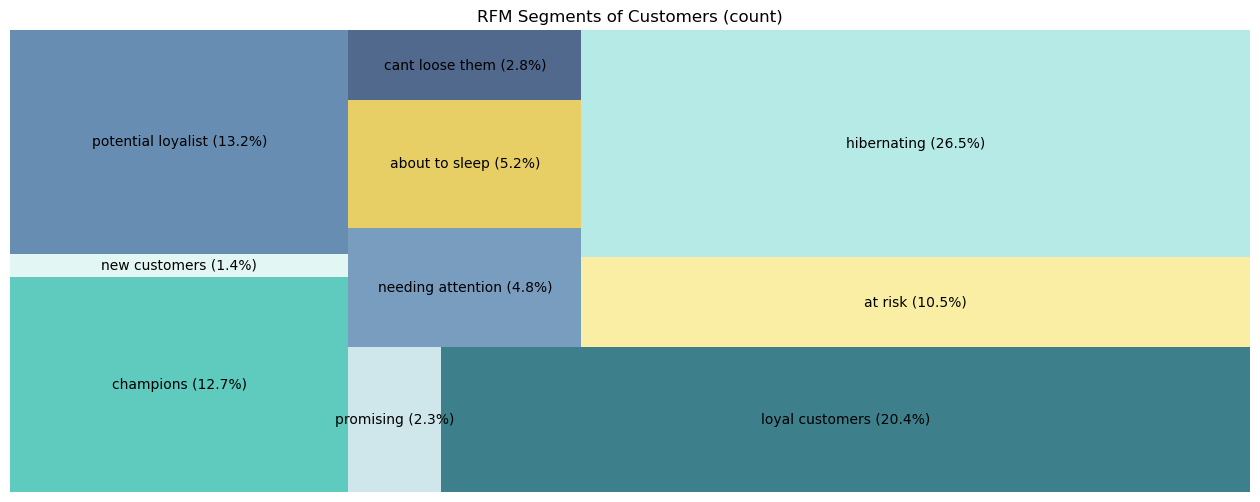

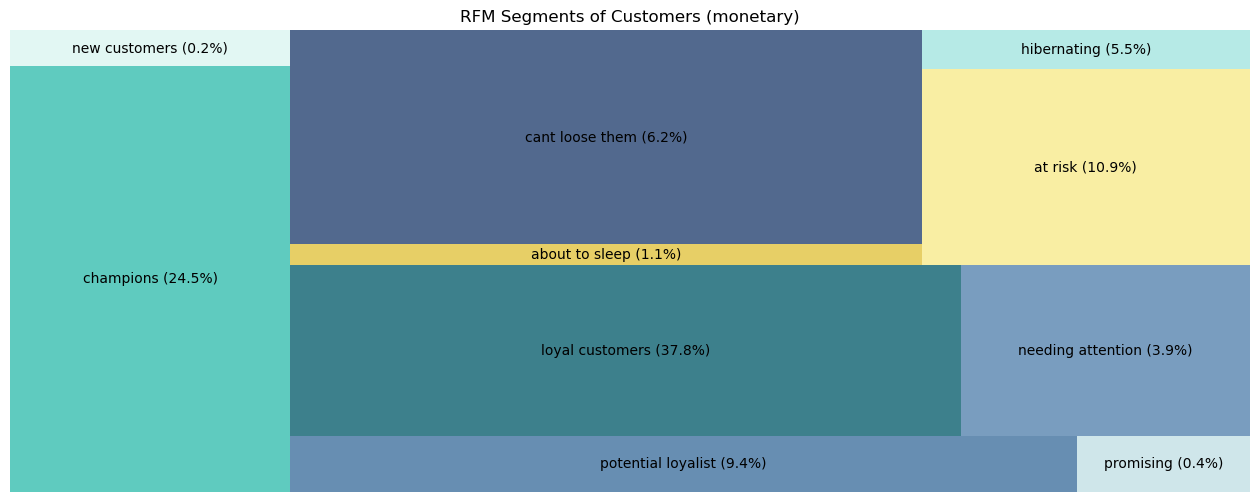

In [38]:
colors = ['#37BEB0', '#DBF5F0', '#41729F', '#C3E0E5', '#0C6170', '#5885AF', '#E1C340', '#274472', '#F8EA8C', '#A4E5E0', '#1848A0']

for col in ['count', 'monetary']:
    labels = df_analysis['label'] + df_analysis[col + '_share'].apply(lambda x: ' ({0:.1f}%)'.format(x*100))

    fig, ax = plt.subplots(figsize=(16,6))
    squarify.plot(sizes=df_analysis[col], label=labels, alpha=.8, color=colors)
    ax.set_title('RFM Segments of Customers (%s)' % col)
    plt.axis('off')
    plt.show()

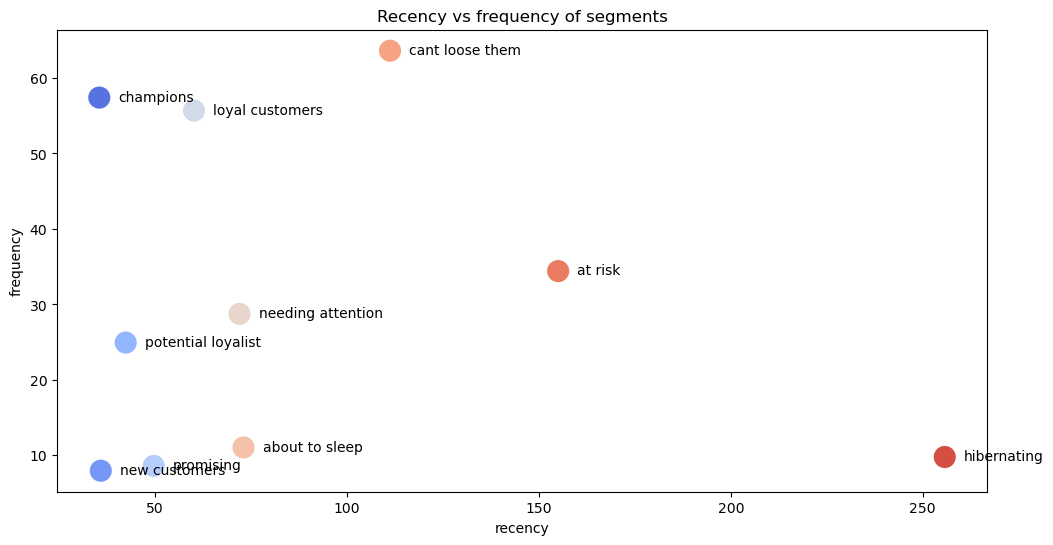

In [39]:
palette = sns.color_palette("coolwarm", 10)

fig, ax = plt.subplots(figsize=(12,6))
plot = sns.scatterplot(x='recency', y='frequency', data=df_analysis, hue='label', s=300, palette=palette)

for i in range(len(df_analysis)):
     plot.text(df_analysis['recency'][i]+5,
               df_analysis['frequency'][i]-0.5,
               df_analysis['label'][i],
               horizontalalignment='left',
               size='medium', color='black')

ax.set_title('Recency vs frequency of segments')
ax.get_legend().remove()
plt.show()

As expected, scatterplot visualizes the set of rules applied to generate RFM segments. 'Champions' and 'loyal customers' are the ones who buy the most often and who made their last order recently. 'New customers' and 'promising' made purchases not long time ago but they are not frequent buyers yet. And 'hibernating' customers are the ones with the lowest recency and frequency scores.

In [40]:
df_analysis

,label,count,recency,frequency,monetary,count_share,monetary_share
0,champions,202,35.43,57.41,"15,340.64",0.13,0.25
1,new customers,22,35.82,7.95,"1,297.46",0.01,0.00
2,potential loyalist,210,42.31,24.94,"5,657.11",0.13,0.09
3,promising,37,49.62,8.59,"1,243.57",0.02,0.00
4,loyal customers,325,60.10,55.69,"14,720.11",0.20,0.38
5,needing attention,77,71.97,28.74,"6,349.44",0.05,0.04
6,about to sleep,83,73.01,11.04,"1,717.53",0.05,0.01
7,cant loose them,45,111.18,63.62,"17,408.80",0.03,0.06
8,at risk,167,154.99,34.41,"8,283.76",0.11,0.11
9,hibernating,422,255.72,9.77,"1,656.07",0.27,0.06


In [41]:
df_rfm

,customer_id,frequency,monetary,recency,r_score,f_score,m_score,rfm_sum,rfm_label
0,AA-10315,42,"13,747.41",39,5,4,4,13,champions
1,AA-10375,42,"5,884.20",37,5,4,3,12,champions
2,AA-10480,38,"17,695.59",148,2,3,5,10,at risk
3,AA-10645,73,"15,343.89",57,4,5,5,14,loyal customers
4,AA-315,8,"2,243.26",33,5,1,2,8,new customers
...,...,...,...,...,...,...,...,...,...
1585,YS-21880,54,"18,703.61",40,5,4,5,14,champions
1586,ZC-11910,1,7.17,231,1,1,1,3,hibernating
1587,ZC-21910,84,"28,472.82",34,5,5,5,15,champions
1588,ZD-11925,18,"2,951.23",34,5,3,2,10,potential loyalist


# We defined the labels based on r_score and f_score 

therefore we use the sum of both 

and train the model over it to predict the labels 

In [42]:
df_rf_1 = df_rfm.copy()

In [43]:
df_rf_1['rf_sum'] = df_rf_1['r_score'] + df_rf_1['f_score']
df_rf_1

,customer_id,frequency,monetary,recency,r_score,f_score,m_score,rfm_sum,rfm_label,rf_sum
0,AA-10315,42,"13,747.41",39,5,4,4,13,champions,9
1,AA-10375,42,"5,884.20",37,5,4,3,12,champions,9
2,AA-10480,38,"17,695.59",148,2,3,5,10,at risk,5
3,AA-10645,73,"15,343.89",57,4,5,5,14,loyal customers,9
4,AA-315,8,"2,243.26",33,5,1,2,8,new customers,6
...,...,...,...,...,...,...,...,...,...,...
1585,YS-21880,54,"18,703.61",40,5,4,5,14,champions,9
1586,ZC-11910,1,7.17,231,1,1,1,3,hibernating,2
1587,ZC-21910,84,"28,472.82",34,5,5,5,15,champions,10
1588,ZD-11925,18,"2,951.23",34,5,3,2,10,potential loyalist,8


In [44]:
df_for_model = df_rf_1[['rf_sum','rfm_label']]

In [47]:
df_for_model['rfm_label']

0                champions
1                champions
2                  at risk
3          loyal customers
4            new customers
               ...        
1585             champions
1586           hibernating
1587             champions
1588    potential loyalist
1589    potential loyalist
Name: rfm_label, Length: 1590, dtype: object

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [49]:
# Define features (X) and target (y)

X = df_for_model['rf_sum']
y = df_for_model['rfm_label']

In [52]:
# Split the train test data

X_train, X_test, y_train, y_test = train_test_split(X ,y ,test_size = 0.3, random_state = 42)

In [55]:
X_train

1244    8
1544    9
346     5
1377    3
1555    7
       ..
1130    4
1294    6
860     8
1459    9
1126    5
Name: rf_sum, Length: 1113, dtype: int32

In [56]:
# Reshape X to make it 2D
X_train = X_train.values.reshape(-1, 1)

In [57]:
X_train

array([[8],
       [9],
       [5],
       ...,
       [8],
       [9],
       [5]])

In [58]:
X_test = X_test.values.reshape(-1, 1)

In [62]:
# create a model 

Model_1 = RandomForestClassifier(random_state=42)
Model_1.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [63]:
# Make predictions

y_pred = Model_1.predict(X_test)

In [69]:

np. column_stack((X_test, y_pred))

array([[9, 'champions'],
       [4, 'hibernating'],
       [9, 'champions'],
       [3, 'hibernating'],
       [7, 'potential loyalist'],
       [3, 'hibernating'],
       [8, 'loyal customers'],
       [7, 'potential loyalist'],
       [5, 'at risk'],
       [2, 'hibernating'],
       [8, 'loyal customers'],
       [8, 'loyal customers'],
       [4, 'hibernating'],
       [7, 'potential loyalist'],
       [6, 'needing attention'],
       [9, 'champions'],
       [8, 'loyal customers'],
       [6, 'needing attention'],
       [3, 'hibernating'],
       [2, 'hibernating'],
       [8, 'loyal customers'],
       [3, 'hibernating'],
       [8, 'loyal customers'],
       [7, 'potential loyalist'],
       [2, 'hibernating'],
       [2, 'hibernating'],
       [10, 'champions'],
       [6, 'needing attention'],
       [2, 'hibernating'],
       [8, 'loyal customers'],
       [6, 'needing attention'],
       [6, 'needing attention'],
       [5, 'at risk'],
       [2, 'hibernating'],
       [10,

In [70]:
# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.6666666666666666
Classification Report:
                     precision    recall  f1-score   support

    about to sleep       0.00      0.00      0.00        27
           at risk       0.47      0.37      0.42        51
   cant loose them       0.00      0.00      0.00        10
         champions       0.79      1.00      0.88        59
       hibernating       0.82      1.00      0.90       125
   loyal customers       0.73      0.54      0.62        97
 needing attention       0.40      1.00      0.57        25
     new customers       0.00      0.00      0.00         5
potential loyalist       0.49      0.55      0.52        69
         promising       0.00      0.00      0.00         9

          accuracy                           0.67       477
         macro avg       0.37      0.45      0.39       477
      weighted avg       0.61      0.67      0.62       477



In [76]:
# Input a new score
new_score = 1
# Reshape the new score to match the model's input format (2D array)
new_score = [[new_score]]
# Predict the label for the new score
predicted_label = Model_1.predict(new_score)
predicted_label

array(['hibernating'], dtype=object)

In [77]:
print(f"The predicted label for the score {new_score[0][0]} is: {predicted_label[0]}")

The predicted label for the score 1 is: hibernating


In [85]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, y_pred)

print('accuracy_score : ',accuracy_score(y_test, y_pred))


accuracy_score :  0.6666666666666666


In [86]:
precision

array([0.        , 0.475     , 0.        , 0.78666667, 0.82236842,
       0.73239437, 0.40322581, 0.        , 0.49350649, 0.        ])

In [92]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

# Assuming you have already trained the model (clf) and you have test data (X_test, y_test)

# Make predictions on the test data
y_pred = Model_1.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate precision, recall, and F1-score for each class
report = classification_report(y_test, y_pred, output_dict=True)
class_names = list(report.keys())[:-3]  # Extract class names (excluding 'accuracy', 'macro avg', and 'weighted avg')


Accuracy: 0.6666666666666666


In [93]:
report

{'about to sleep': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 27},
 'at risk': {'precision': 0.475,
  'recall': 0.37254901960784315,
  'f1-score': 0.4175824175824176,
  'support': 51},
 'cant loose them': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 10},
 'champions': {'precision': 0.7866666666666666,
  'recall': 1.0,
  'f1-score': 0.8805970149253731,
  'support': 59},
 'hibernating': {'precision': 0.8223684210526315,
  'recall': 1.0,
  'f1-score': 0.9025270758122744,
  'support': 125},
 'loyal customers': {'precision': 0.7323943661971831,
  'recall': 0.5360824742268041,
  'f1-score': 0.6190476190476191,
  'support': 97},
 'needing attention': {'precision': 0.4032258064516129,
  'recall': 1.0,
  'f1-score': 0.5747126436781609,
  'support': 25},
 'new customers': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 5},
 'potential loyalist': {'precision': 0.4935064935064935,
  'recall': 0.5507246376811594,
  'f1-score': 0.52

In [94]:
class_names

['about to sleep',
 'at risk',
 'cant loose them',
 'champions',
 'hibernating',
 'loyal customers',
 'needing attention',
 'new customers',
 'potential loyalist',
 'promising']

In [95]:

# Extract precision, recall, and F1-score for each class
precision = [report[class_name]['precision'] for class_name in class_names]
recall = [report[class_name]['recall'] for class_name in class_names]

In [103]:
a = {'lab':class_names, 'pre': precision, 'rec':recall}

In [104]:
pd.DataFrame(a)

,lab,pre,rec
0,about to sleep,0.00,0.00
1,at risk,0.47,0.37
2,cant loose them,0.00,0.00
3,champions,0.79,1.00
4,hibernating,0.82,1.00
5,loyal customers,0.73,0.54
6,needing attention,0.40,1.00
7,new customers,0.00,0.00
8,potential loyalist,0.49,0.55
9,promising,0.00,0.00


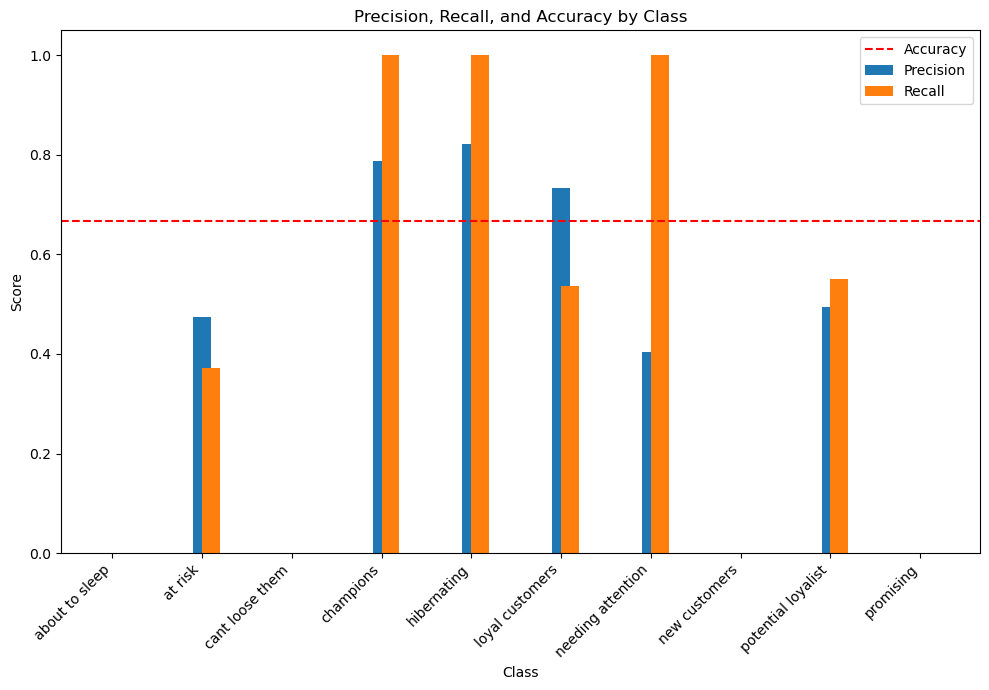

In [105]:
# Plot precision, recall, and accuracy

fig, ax = plt.subplots(figsize=(10, 7))
x = range(len(class_names))

# Plot precision
ax.bar(x, precision, width=0.2, label='Precision', align='center')
# Plot recall
ax.bar(x, recall, width=0.2, label='Recall', align='edge')
# Plot accuracy as a horizontal line
ax.axhline(y=accuracy, color='red', linestyle='--', label='Accuracy')

# Set x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(class_names, rotation=45, ha='right')
ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and Accuracy by Class')

# Display the legend
ax.legend()

plt.tight_layout()
plt.show()